In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from sklearn.impute import SimpleImputer

In [2]:
os.chdir("/content/Dataset")

In [3]:
files = os.listdir()
files.remove("Economics.pdf")
files.remove("ReadMe.pdf")
files.remove("Weather")

In [4]:
files

['Reference', 'TheAutomators', 'Digilog', 'Automatoes', 'AICU', 'IUACAAS']

In [5]:
Production = {}
for i in files:
  filepath = os.path.join(i, "Production.csv")
  Production[i] = pd.read_csv(filepath)

In [6]:
Production[files[0]].head()

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0


In [7]:
si = SimpleImputer(strategy = "mean")
for i in files:
  column_names = Production[i].columns
  values = Production[i].values
  df = si.fit_transform(values)
  Production[i] = pd.DataFrame(df, columns = column_names)

In [8]:
for i in range(len(files)):
  Production[files[i]]['%time'] = pd.to_datetime(Production[files[i]]['%time'], unit='D', origin='1899-12-30')

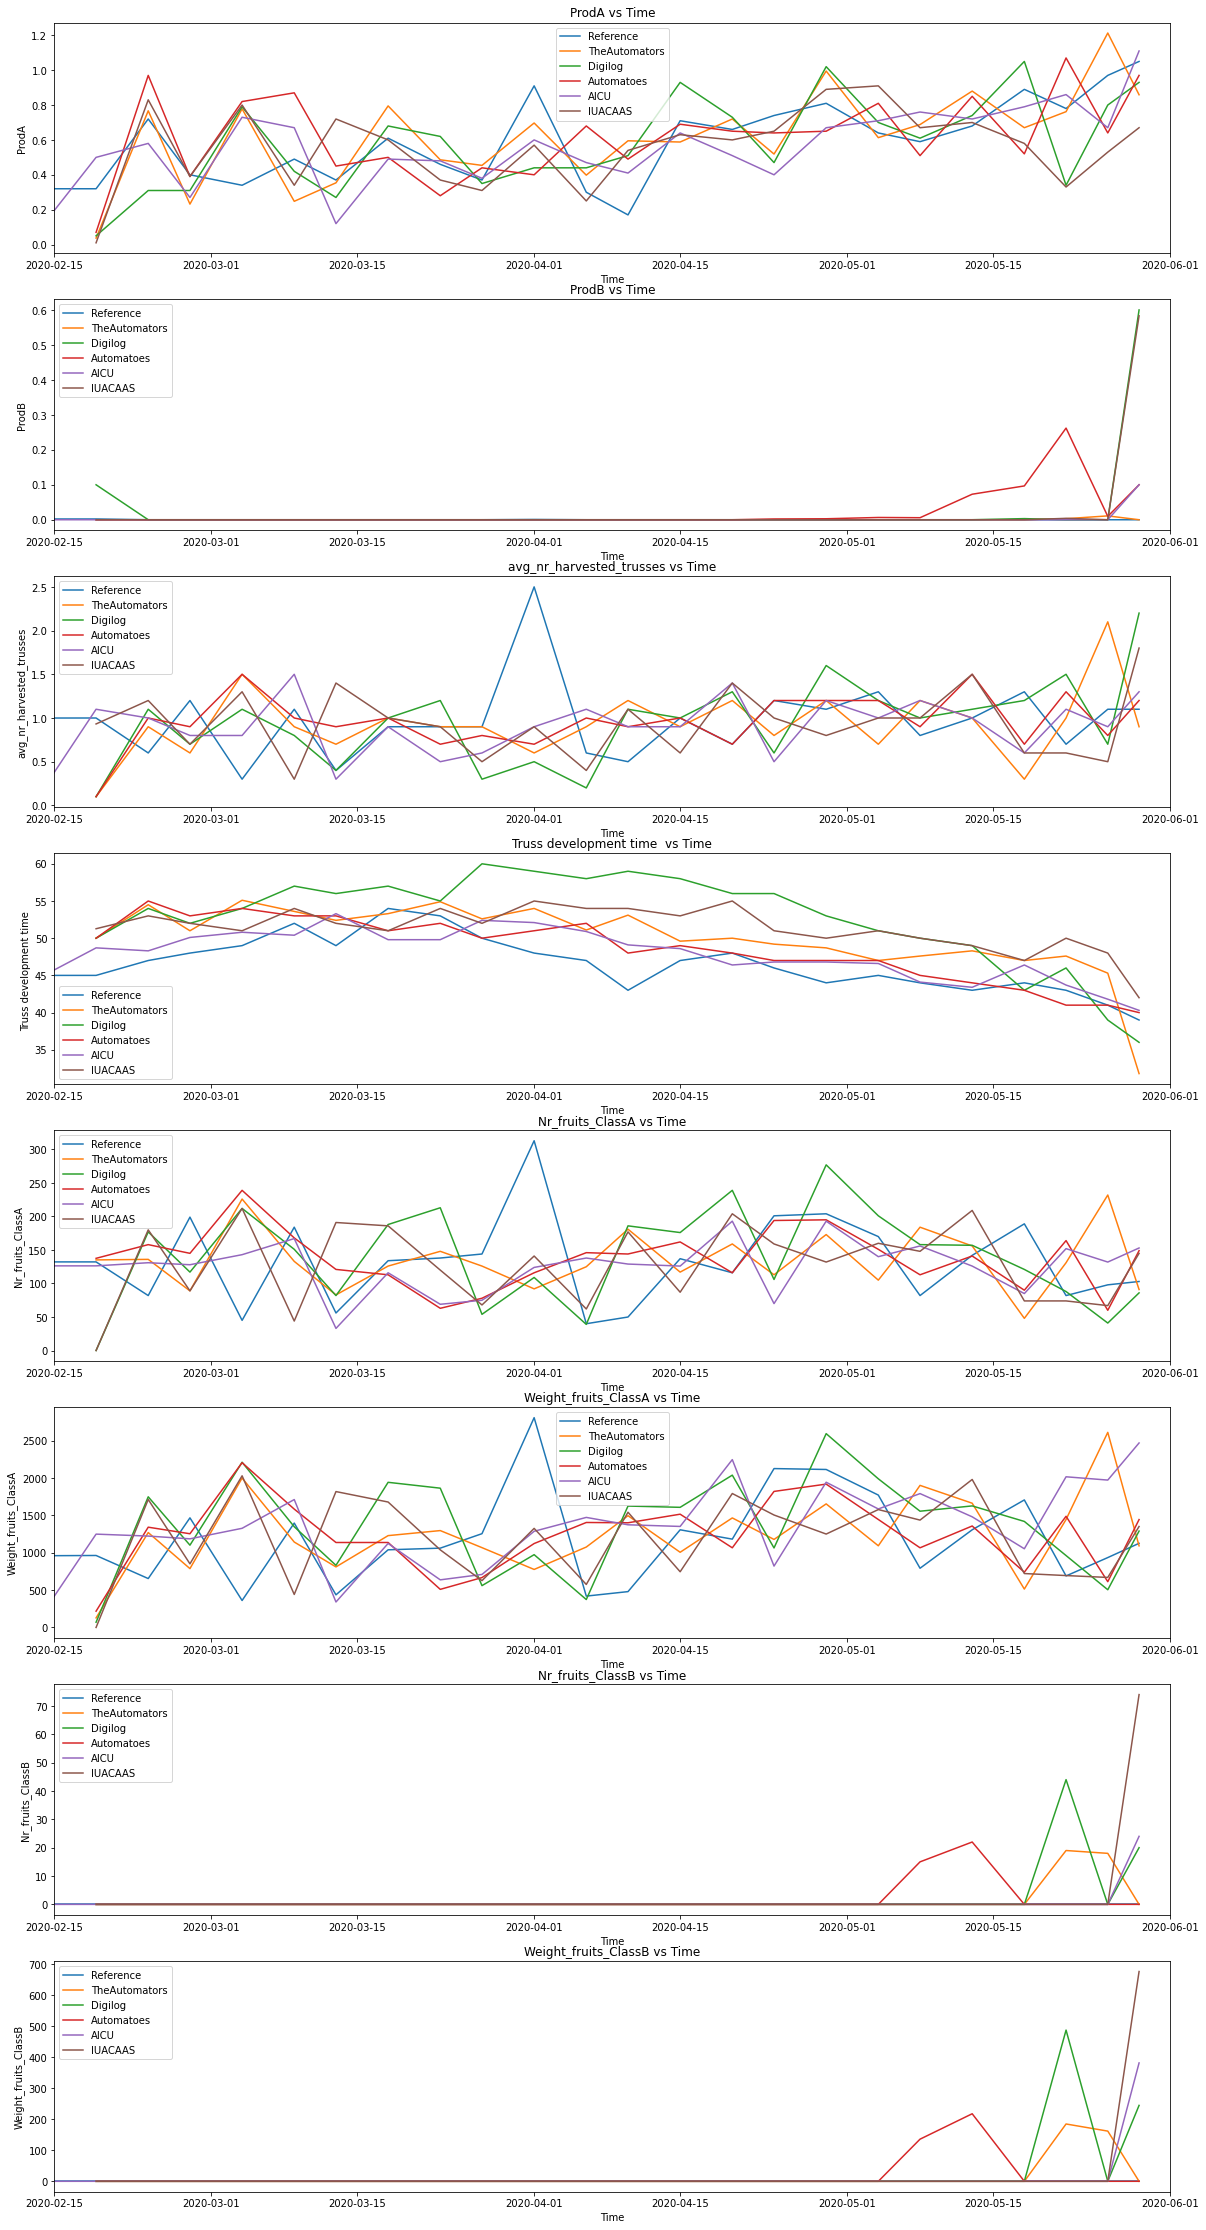

In [9]:
parameters = list(Production[files[0]].columns)
parameters.remove("%time")
plt.figure(figsize = (20, 45))
for paramnum, param in enumerate(parameters):
  plt.subplot(9, 1, paramnum + 1)
  for i in range(len(files)):
    plt.plot(Production[files[i]]["%time"], Production[files[i]][param])
  plt.legend(files, loc = "best")
  plt.title(f"{param} vs Time")
  plt.xlim([datetime.date(2020, 2, 15), datetime.date(2020, 6, 1)])
  plt.xlabel("Time")
  plt.ylabel(f"{param}")
plt.show()